# Scalers and Transformers in Sklearn

## Why Feature Scaling?

**Problem**: Features with different scales can dominate the learning process.

**Example**:
- Age: 25-80 (small range)
- Income: 20,000-150,000 (large range)

Machine learning algorithms (especially distance-based ones like KNN, SVM, Neural Networks) treat all features equally. Without scaling, 'Income' would dominate because its values are much larger.

## When to Scale?

| Need Scaling | Don't Need Scaling |
|--------------|--------------------|
| Neural Networks | Tree-based models (Decision Trees, Random Forest, XGBoost) |
| SVM | Naive Bayes |
| KNN | |
| Linear/Logistic Regression | |
| PCA, K-Means | |

## Types of Scalers

| Scaler | Formula | Range | Use When |
|--------|---------|-------|----------|
| **StandardScaler** | \\( \frac{x - \mu}{\sigma} \\) | Mean=0, Std=1 | Data is normally distributed |
| **MinMaxScaler** | \\( \frac{x - x_{min}}{x_{max} - x_{min}} \\) | [0, 1] or custom | Need bounded range |
| **RobustScaler** | \\( \frac{x - Q_{50}}{Q_{75} - Q_{25}} \\) | Varies | Data has outliers |
| **PowerTransformer** | Box-Cox/Yeo-Johnson | ~Normal dist | Make data more Gaussian |
| **Normalizer** | \\( \frac{x}{||x||} \\) | L2 norm = 1 | For text/sparse data |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler, 
    PowerTransformer, Normalizer
)
from sklearn.datasets import load_diabetes, load_wine

# Set random seed for reproducibility
np.random.seed(42)

## Example Dataset: Employee Data

Let's create a realistic dataset with different scales:

In [2]:
# Create sample employee data
data = {
    'age': [25, 30, 35, 40, 45, 50, 28, 33, 38, 43],
    'salary': [45000, 55000, 65000, 75000, 85000, 95000, 50000, 60000, 70000, 80000],
    'experience_years': [2, 5, 8, 12, 15, 20, 3, 6, 10, 14],
    'hours_per_week': [40, 45, 42, 38, 50, 48, 41, 43, 39, 46]
}

df = pd.DataFrame(data)

print("Original Data:")
print(df)
print("\nStatistics:")
print(df.describe())

# Notice the different scales:
print("\nFeature Ranges:")
for col in df.columns:
    print(f"{col:20s}: [{df[col].min():,.0f}, {df[col].max():,.0f}]")

Original Data:
   age  salary  experience_years  hours_per_week
0   25   45000                 2              40
1   30   55000                 5              45
2   35   65000                 8              42
3   40   75000                12              38
4   45   85000                15              50
5   50   95000                20              48
6   28   50000                 3              41
7   33   60000                 6              43
8   38   70000                10              39
9   43   80000                14              46

Statistics:
             age        salary  experience_years  hours_per_week
count  10.000000     10.000000         10.000000       10.000000
mean   36.700000  68000.000000          9.500000       43.200000
std     7.972871  16020.819788          5.778312        3.966527
min    25.000000  45000.000000          2.000000       38.000000
25%    30.750000  56250.000000          5.250000       40.250000
50%    36.500000  67500.000000          9.0

## 1. StandardScaler (Z-score Normalization)

**Definition**: Transforms features to have mean=0 and standard deviation=1

**Formula**: \\( z = \frac{x - \mu}{\sigma} \\)
- \\(\mu\\) = mean of feature
- \\(\sigma\\) = standard deviation

**When to Use**:
- Data is roughly normally distributed
- No strict bounds needed
- Most common choice for many algorithms

**Assumptions**: Features follow Gaussian distribution (no strong outliers)

In [3]:
# StandardScaler
scaler_std = StandardScaler()

# Fit and transform
df_std = pd.DataFrame(
    scaler_std.fit_transform(df),
    columns=df.columns
)

print("StandardScaler Results:")
print(df_std.round(3))
print("\nVerify: Mean ≈ 0, Std ≈ 1")
print(df_std.describe().round(3))

# Access learned parameters
print("\nLearned Parameters:")
print(f"Mean (µ):  {scaler_std.mean_}")
print(f"Std (σ):   {np.sqrt(scaler_std.var_)}")

StandardScaler Results:
     age  salary  experience_years  hours_per_week
0 -1.547  -1.513            -1.368          -0.850
1 -0.886  -0.855            -0.821           0.478
2 -0.225  -0.197            -0.274          -0.319
3  0.436   0.461             0.456          -1.382
4  1.097   1.119             1.003           1.807
5  1.758   1.776             1.915           1.276
6 -1.150  -1.184            -1.186          -0.585
7 -0.489  -0.526            -0.638          -0.053
8  0.172   0.132             0.091          -1.116
9  0.833   0.790             0.821           0.744

Verify: Mean ≈ 0, Std ≈ 1
          age  salary  experience_years  hours_per_week
count  10.000  10.000            10.000          10.000
mean   -0.000   0.000             0.000          -0.000
std     1.054   1.054             1.054           1.054
min    -1.547  -1.513            -1.368          -1.382
25%    -0.787  -0.773            -0.775          -0.784
50%    -0.026  -0.033            -0.091          -0.

## 2. MinMaxScaler

**Definition**: Scales features to a fixed range (default [0, 1])

**Formula**: \\( x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}} \\)

**When to Use**:
- Need features in specific range (e.g., [0, 1] for neural networks)
- Data has known bounds
- Image pixel values (already in [0, 255])

**Warning**: Sensitive to outliers (one extreme value affects entire scaling)

In [4]:
# MinMaxScaler (default: [0, 1])
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(
    scaler_minmax.fit_transform(df),
    columns=df.columns
)

print("MinMaxScaler Results (range [0, 1]):")
print(df_minmax.round(3))
print("\nMin and Max values:")
print(f"Min: {df_minmax.min().values}")
print(f"Max: {df_minmax.max().values}")

# Custom range [-1, 1]
scaler_custom = MinMaxScaler(feature_range=(-1, 1))
df_custom = pd.DataFrame(
    scaler_custom.fit_transform(df),
    columns=df.columns
)

print("\nMinMaxScaler with custom range [-1, 1]:")
print(df_custom.round(3))
print(f"\nRange: [{df_custom.min().min():.1f}, {df_custom.max().max():.1f}]")

MinMaxScaler Results (range [0, 1]):
    age  salary  experience_years  hours_per_week
0  0.00     0.0             0.000           0.167
1  0.20     0.2             0.167           0.583
2  0.40     0.4             0.333           0.333
3  0.60     0.6             0.556           0.000
4  0.80     0.8             0.722           1.000
5  1.00     1.0             1.000           0.833
6  0.12     0.1             0.056           0.250
7  0.32     0.3             0.222           0.417
8  0.52     0.5             0.444           0.083
9  0.72     0.7             0.667           0.667

Min and Max values:
Min: [0. 0. 0. 0.]
Max: [1. 1. 1. 1.]

MinMaxScaler with custom range [-1, 1]:
    age  salary  experience_years  hours_per_week
0 -1.00    -1.0            -1.000          -0.667
1 -0.60    -0.6            -0.667           0.167
2 -0.20    -0.2            -0.333          -0.333
3  0.20     0.2             0.111          -1.000
4  0.60     0.6             0.444           1.000
5  1.00     1

## 3. RobustScaler

**Definition**: Scales using median and IQR (Interquartile Range), robust to outliers

**Formula**: \\( x_{scaled} = \frac{x - Q_{50}}{Q_{75} - Q_{25}} \\)
- \\(Q_{50}\\) = Median
- \\(Q_{75} - Q_{25}\\) = IQR (middle 50% of data)

**When to Use**:
- Data has outliers
- Distribution is skewed
- Don't want outliers to affect scaling

**Advantage**: Outliers don't influence the scaling parameters

In [5]:
# Add outlier to demonstrate RobustScaler
df_with_outlier = df.copy()
df_with_outlier.loc[10] = [25, 250000, 2, 40]  # Salary outlier!

print("Data with Outlier:")
print(df_with_outlier)

# Compare StandardScaler vs RobustScaler
print("\n" + "="*60)
print("COMPARISON: StandardScaler vs RobustScaler")
print("="*60)

# StandardScaler (affected by outlier)
std_scaler = StandardScaler()
df_std_out = pd.DataFrame(
    std_scaler.fit_transform(df_with_outlier),
    columns=df.columns
)

# RobustScaler (not affected by outlier)
robust_scaler = RobustScaler()
df_robust = pd.DataFrame(
    robust_scaler.fit_transform(df_with_outlier),
    columns=df.columns
)

print("\nStandardScaler (salary column):")
print(df_std_out['salary'].values)
print(f"Notice: Outlier at index 10 has value {df_std_out['salary'].iloc[10]:.2f}")
print(f"Other values compressed near 0")

print("\nRobustScaler (salary column):")
print(df_robust['salary'].values)
print(f"Outlier: {df_robust['salary'].iloc[10]:.2f}")
print(f"Other values preserve their relative differences")

Data with Outlier:
    age  salary  experience_years  hours_per_week
0    25   45000                 2              40
1    30   55000                 5              45
2    35   65000                 8              42
3    40   75000                12              38
4    45   85000                15              50
5    50   95000                20              48
6    28   50000                 3              41
7    33   60000                 6              43
8    38   70000                10              39
9    43   80000                14              46
10   25  250000                 2              40

COMPARISON: StandardScaler vs RobustScaler

StandardScaler (salary column):
[-0.72839699 -0.54420465 -0.36001231 -0.17581996  0.00837238  0.19256472
 -0.63630082 -0.45210848 -0.26791613 -0.08372379  3.04754603]
Notice: Outlier at index 10 has value 3.05
Other values compressed near 0

RobustScaler (salary column):
[-1.  -0.6 -0.2  0.2  0.6  1.  -0.8 -0.4  0.   0.4  7.2]
Outlier

## 4. PowerTransformer

**Definition**: Applies power transformation to make data more Gaussian (normal)

**Two Methods**:
1. **Box-Cox**: Only for positive data, estimates best power
2. **Yeo-Johnson**: Works with positive and negative data

**When to Use**:
- Data is highly skewed
- Need to reduce skewness for algorithms that assume normality
- Improve model performance

**Effect**: Makes skewed distribution more bell-shaped

Original Skewed Data Statistics:
Mean: 1.95
Median: 1.37
Skewness: 1.87

Transformed Data Statistics:
Mean: 0.00
Median: 0.04
Skewness: 0.07

Notice: Skewness closer to 0 (more symmetric)


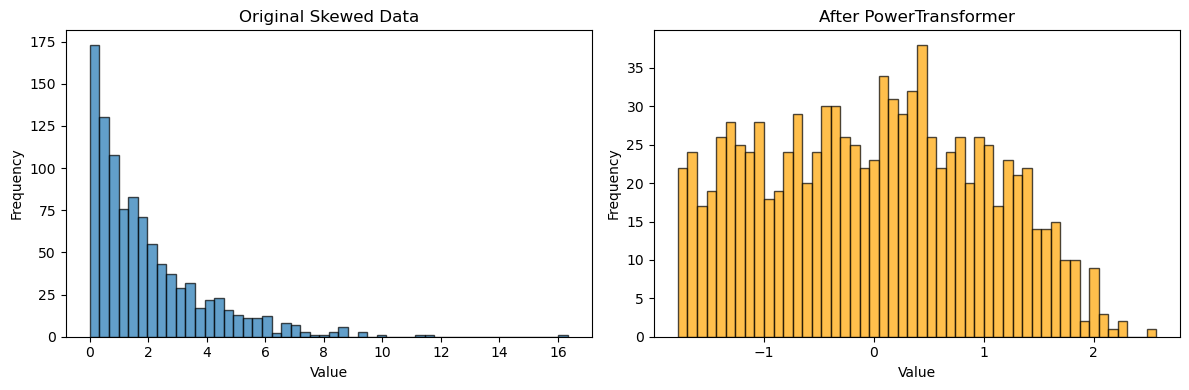

In [6]:
# Create skewed data
np.random.seed(42)
skewed_data = np.random.exponential(scale=2.0, size=1000).reshape(-1, 1)

print("Original Skewed Data Statistics:")
print(f"Mean: {skewed_data.mean():.2f}")
print(f"Median: {np.median(skewed_data):.2f}")
print(f"Skewness: {pd.Series(skewed_data.flatten()).skew():.2f}")

# Apply PowerTransformer (Yeo-Johnson)
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
transformed_data = power_transformer.fit_transform(skewed_data)

print("\nTransformed Data Statistics:")
print(f"Mean: {transformed_data.mean():.2f}")
print(f"Median: {np.median(transformed_data):.2f}")
print(f"Skewness: {pd.Series(transformed_data.flatten()).skew():.2f}")
print("\nNotice: Skewness closer to 0 (more symmetric)")

# Visualize transformation
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(skewed_data, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Original Skewed Data')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

axes[1].hist(transformed_data, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('After PowerTransformer')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 5. Normalizer

**Definition**: Scales each sample (row) to have unit norm

**Formula**: \\( x_{norm} = \frac{x}{||x||_p} \\)
- L1 norm: \\( ||x||_1 = |x_1| + |x_2| + ... \\)
- L2 norm: \\( ||x||_2 = \sqrt{x_1^2 + x_2^2 + ...} \\)

**When to Use**:
- Text classification (TF-IDF vectors)
- Comparing similarity between samples
- Neural networks with sparse data

**Key Difference**: Normalizes ROWS, not COLUMNS (unlike other scalers)

In [7]:
# Sample data (3 samples, 4 features)
X = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

print("Original Data:")
print(X)

# L2 Normalizer (default)
normalizer_l2 = Normalizer(norm='l2')
X_l2 = normalizer_l2.fit_transform(X)

print("\nL2 Normalized:")
print(X_l2.round(3))
print("\nVerify: Each row has L2 norm = 1")
print("Row norms:", np.linalg.norm(X_l2, axis=1))

# L1 Normalizer
normalizer_l1 = Normalizer(norm='l1')
X_l1 = normalizer_l1.fit_transform(X)

print("\nL1 Normalized:")
print(X_l1.round(3))
print("\nVerify: Each row sums to 1")
print("Row sums:", X_l1.sum(axis=1))

Original Data:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

L2 Normalized:
[[0.183 0.365 0.548 0.73 ]
 [0.379 0.455 0.531 0.606]
 [0.426 0.474 0.521 0.568]]

Verify: Each row has L2 norm = 1
Row norms: [1. 1. 1.]

L1 Normalized:
[[0.1   0.2   0.3   0.4  ]
 [0.192 0.231 0.269 0.308]
 [0.214 0.238 0.262 0.286]]

Verify: Each row sums to 1
Row sums: [1. 1. 1.]


## Real-World Example: Wine Dataset

Compare scaler effects on actual ML dataset:

In [8]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load wine dataset
wine = load_wine()
X, y = wine.data, wine.target

print("Wine Dataset:")
print(f"Samples: {X.shape[0]}, Features: {X.shape[1]}")
print(f"\nFeature ranges (unscaled):")
for i, name in enumerate(wine.feature_names[:5]):
    print(f"{name:30s}: [{X[:, i].min():.2f}, {X[:, i].max():.2f}]")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Test different scalers with SVM
scalers = {
    'No Scaling': None,
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'PowerTransformer': PowerTransformer()
}

print("\n" + "="*60)
print("SVM Performance with Different Scalers")
print("="*60)

for name, scaler in scalers.items():
    if scaler is None:
        X_train_scaled = X_train
        X_test_scaled = X_test
    else:
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    
    # Train SVM
    svm = SVC(random_state=42)
    svm.fit(X_train_scaled, y_train)
    
    # Evaluate
    train_acc = svm.score(X_train_scaled, y_train)
    test_acc = svm.score(X_test_scaled, y_test)
    
    print(f"\n{name:20s}: Train={train_acc:.4f}, Test={test_acc:.4f}")

Wine Dataset:
Samples: 178, Features: 13

Feature ranges (unscaled):
alcohol                       : [11.03, 14.83]
malic_acid                    : [0.74, 5.80]
ash                           : [1.36, 3.23]
alcalinity_of_ash             : [10.60, 30.00]
magnesium                     : [70.00, 162.00]

SVM Performance with Different Scalers

No Scaling          : Train=0.6694, Test=0.7593

StandardScaler      : Train=1.0000, Test=0.9815

MinMaxScaler        : Train=1.0000, Test=0.9815

RobustScaler        : Train=1.0000, Test=0.9815

PowerTransformer    : Train=1.0000, Test=1.0000


## Important Concepts

### 1. Fit vs Transform vs Fit_Transform

```python
# TRAINING DATA
scaler.fit(X_train)              # Learn parameters (mean, std, min, max)
X_train_scaled = scaler.transform(X_train)  # Apply scaling
# OR in one step:
X_train_scaled = scaler.fit_transform(X_train)

# TEST DATA (IMPORTANT!)
X_test_scaled = scaler.transform(X_test)    # Use SAME parameters from training
# NEVER: scaler.fit_transform(X_test)  # This would cause data leakage!
```

### 2. Data Leakage Prevention

**❌ Wrong**:
```python
X_scaled = scaler.fit_transform(X)  # Scales all data together
X_train, X_test = train_test_split(X_scaled)
```
Problem: Test data influences scaling parameters!

**✓ Correct**:
```python
X_train, X_test = train_test_split(X)  # Split first
X_train_scaled = scaler.fit_transform(X_train)  # Fit on train only
X_test_scaled = scaler.transform(X_test)        # Apply to test
```

### 3. Inverse Transform

Get back original values:

In [9]:
# Original data
original = np.array([[25, 50000], [30, 60000]])
print("Original:")
print(original)

# Scale
scaler = StandardScaler()
scaled = scaler.fit_transform(original)
print("\nScaled:")
print(scaled)

# Inverse transform
back_to_original = scaler.inverse_transform(scaled)
print("\nInverse Transform:")
print(back_to_original)
print("\nAre they equal?", np.allclose(original, back_to_original))

Original:
[[   25 50000]
 [   30 60000]]

Scaled:
[[-1. -1.]
 [ 1.  1.]]

Inverse Transform:
[[2.5e+01 5.0e+04]
 [3.0e+01 6.0e+04]]

Are they equal? True


## Quick Decision Guide

```
START
  |
  ├─ Tree-based model? → NO SCALING NEEDED
  |
  ├─ Has outliers?
  │   └─ Yes → RobustScaler
  │   └─ No → Continue
  |
  ├─ Need specific range?
  │   └─ Yes → MinMaxScaler
  │   └─ No → Continue
  |
  ├─ Data very skewed?
  │   └─ Yes → PowerTransformer
  │   └─ No → Continue
  |
  ├─ Text/sparse data?
  │   └─ Yes → Normalizer
  │   └─ No → StandardScaler (default choice)
```

## Key Takeaways

1. **Always scale** for distance-based algorithms (KNN, SVM, Neural Networks)
2. **StandardScaler** is the default choice for most cases
3. **RobustScaler** when you have outliers
4. **MinMaxScaler** when you need bounded range
5. **PowerTransformer** to reduce skewness
6. **Fit on training data only** to prevent data leakage
7. **Use pipelines** to ensure correct order of operations